Trying sink merging 

Look at 465194.out sink doesn't seem to be merged. No idea why. Maybe there's additional sink_merging criterion? 

In [1]:
# import sys
# sys.path

In [2]:
import sys
# sys.path.remove('//anaconda/lib/python2.7/site-packages')
sys.path.append('/global/homes/d/dorislee/anaconda/lib/python2.7/site-packages')

In [3]:
import yt 
yt.mylog.setLevel(50)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
cd ~/project/FLASH4.3_3/object/

/global/project/projectdirs/astro250/doris/FLASH4.3_3/object


In [5]:
import yt
from yt.mods import *
yt.funcs.mylog.setLevel(50) #coerce output null
def plot_dens(i,velocity=False,grid=False,zmin ="",zmax=""):
    ds = yt.load("sod_hdf5_chk_{}".format(str(i).zfill(4)))
    physical_quantity="density"
    slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
    slc.set_figure_size(5)
    if grid: slc.annotate_grids()
    if velocity: slc.annotate_velocity()
    slc.set_cmap("all","rainbow")
    if zmin!="" and zmax!="": slc.set_zlim(physical_quantity,zmin,zmax)
    slc.show()

For the FACTOR = 100 sphere, core formation seemed to happen at t = 9.60E+11 s. So we want to introduce a sink particle at that time. 

/anaconda2/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):



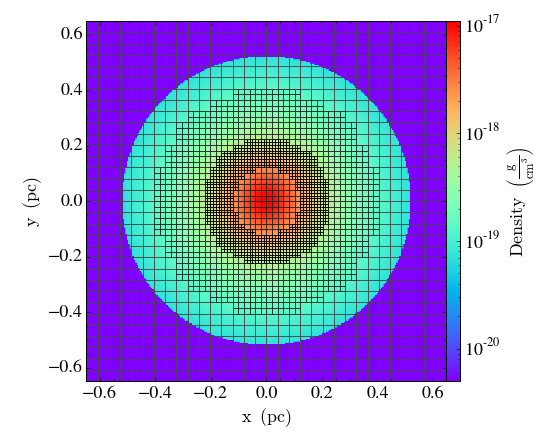

In [19]:
plot_dens(0,grid=True)

/anaconda2/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):



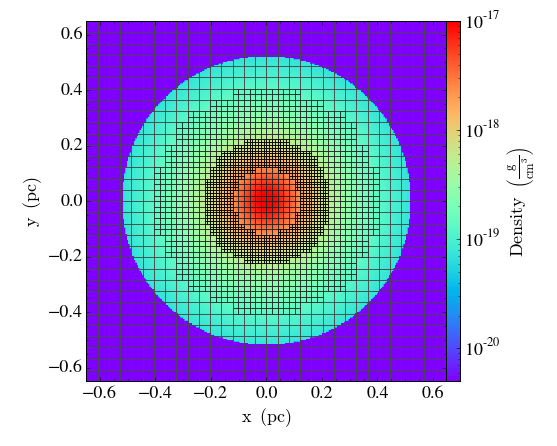


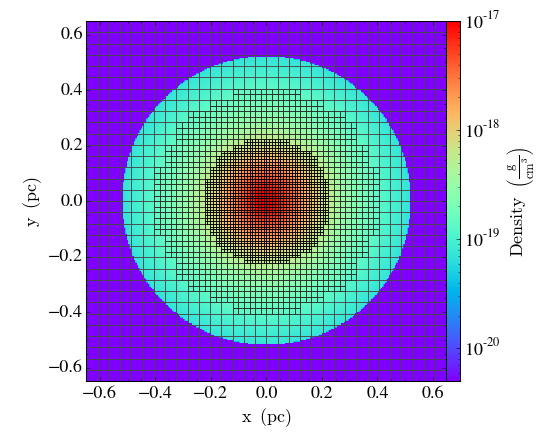


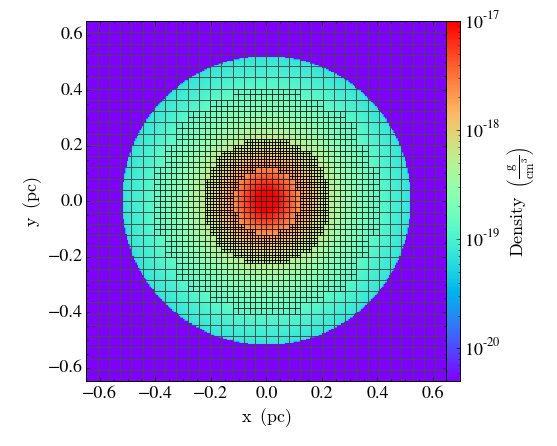


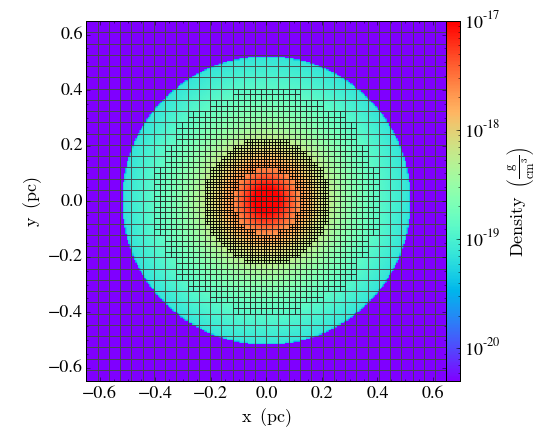


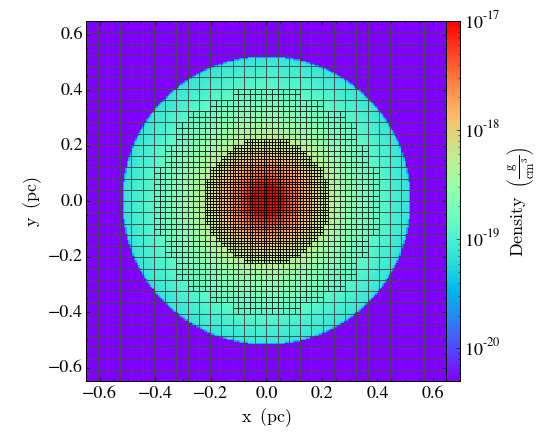


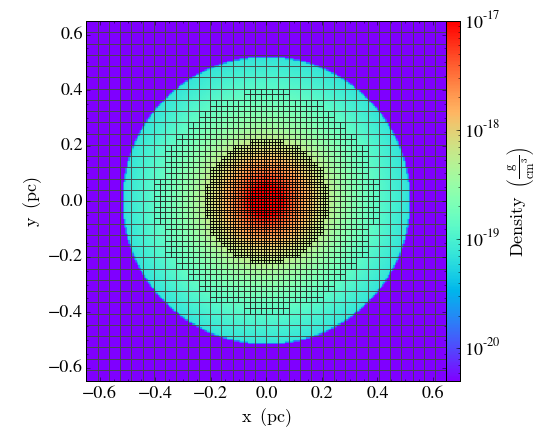


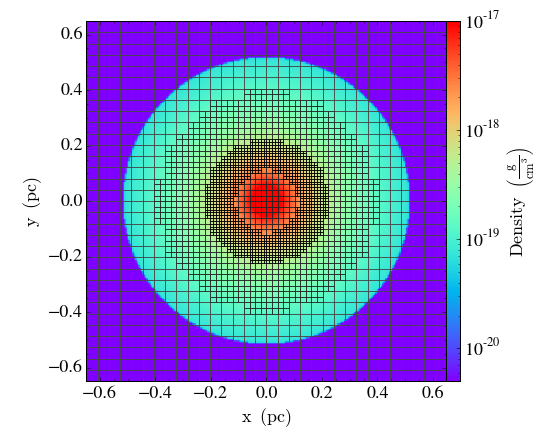


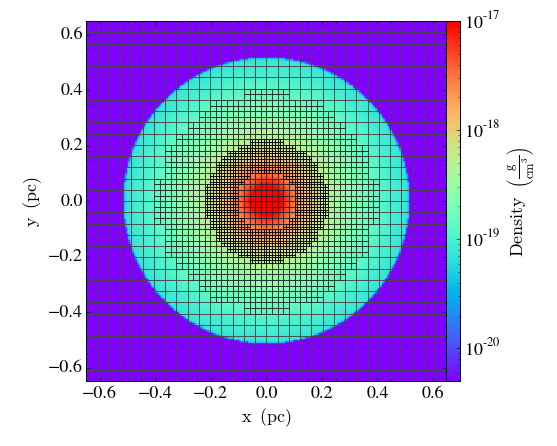


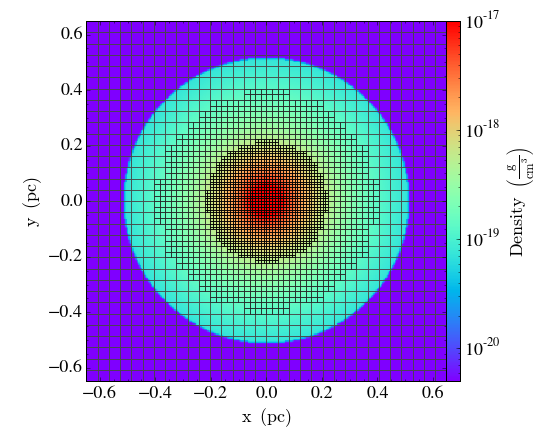


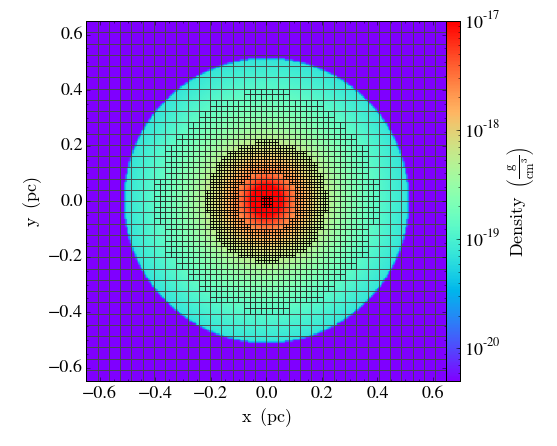


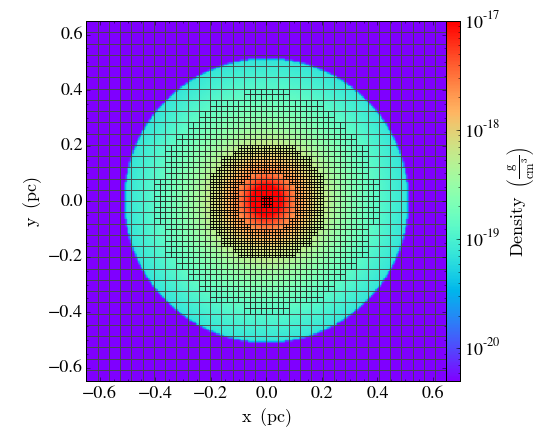

In [6]:
FINAL_STEP = 51
for i in np.arange(FINAL_STEP):
    if i%5==0:
        plot_dens(i,grid=True,zmin = 5e-21,zmax=1e-17)


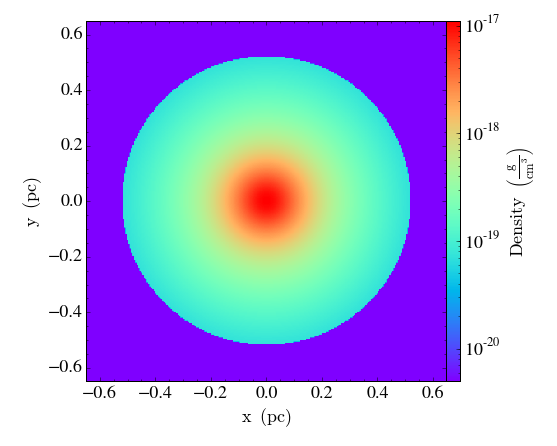


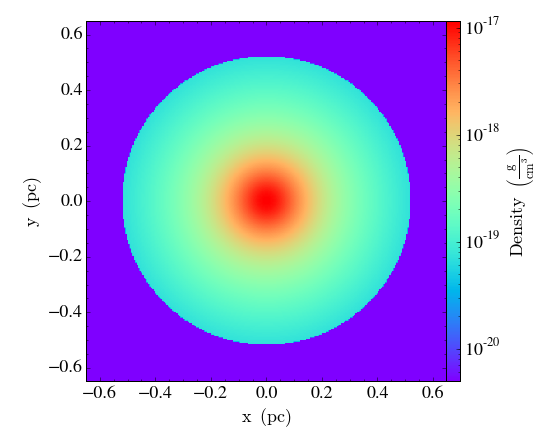


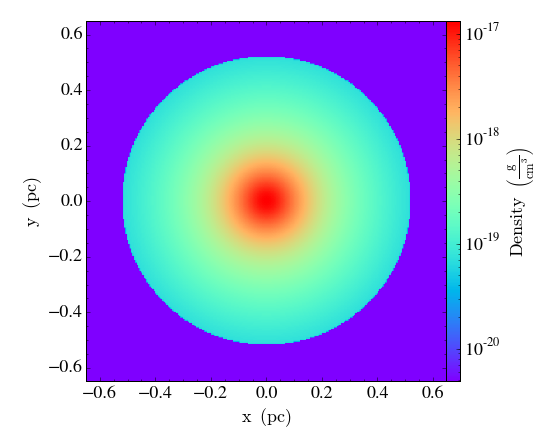


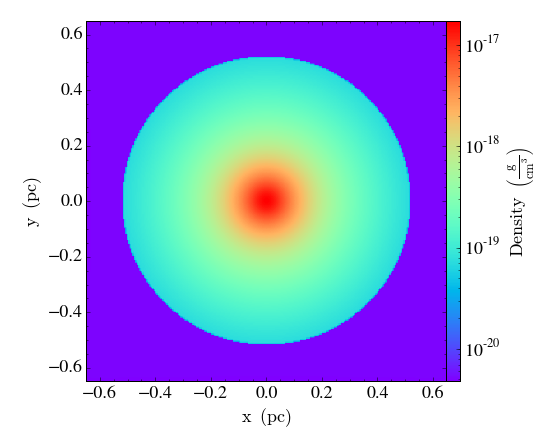


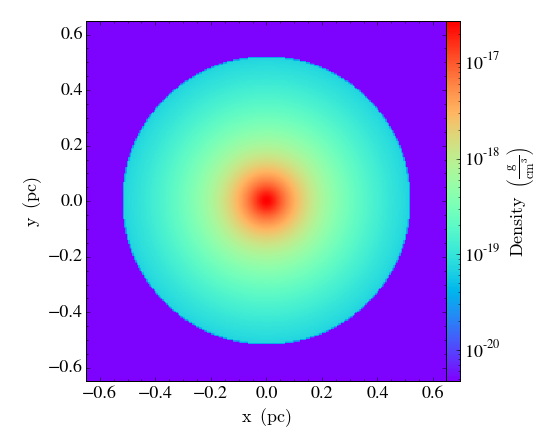


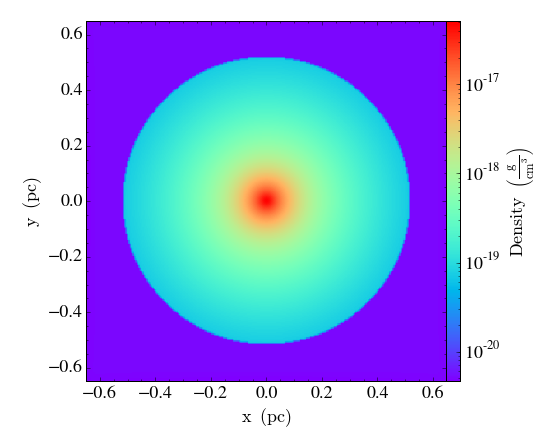


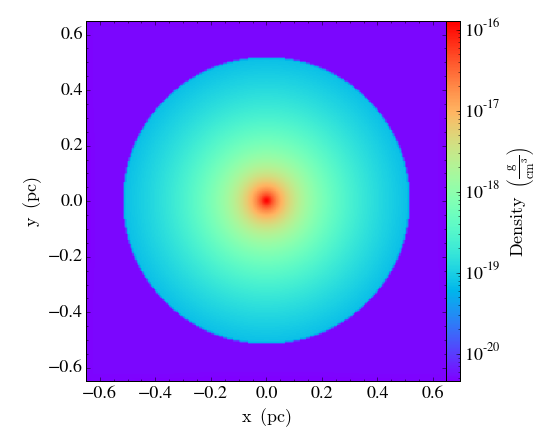


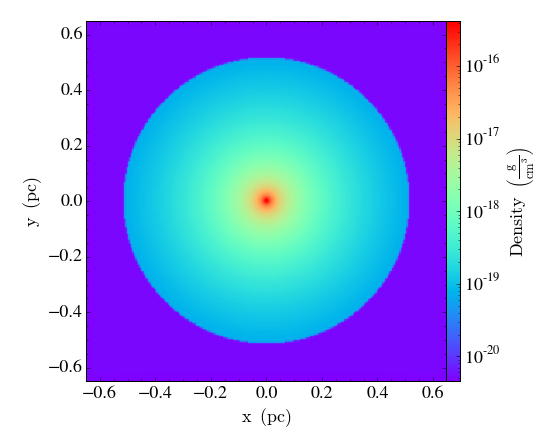


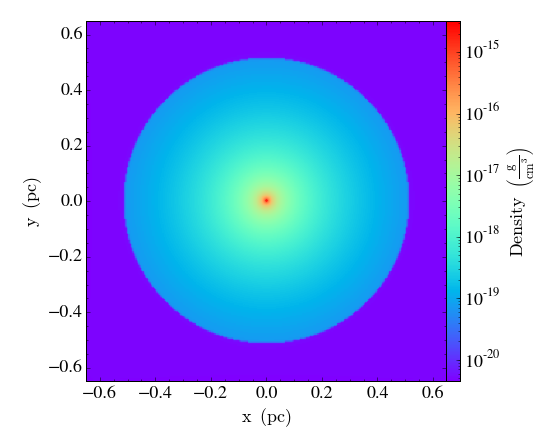


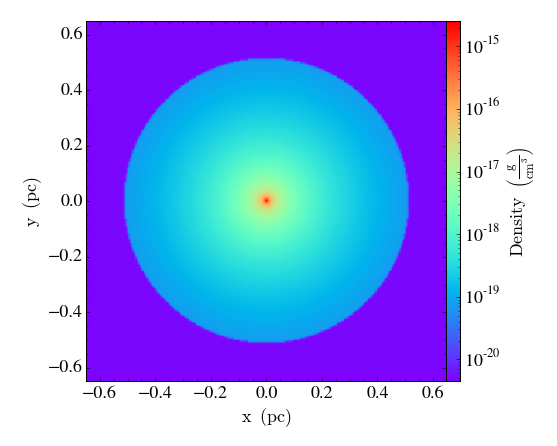


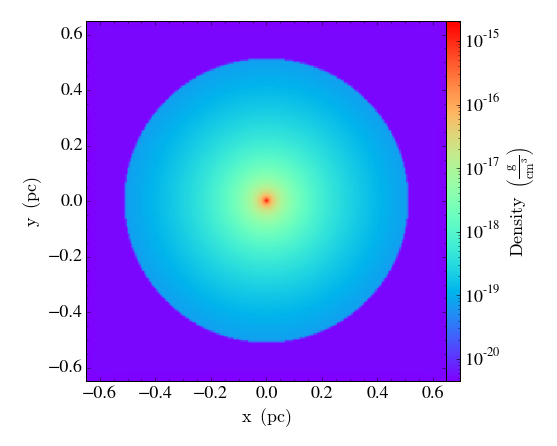

In [10]:
FINAL_STEP = 51
for i in np.arange(FINAL_STEP):
    if i%5==0:
        plot_dens(i,grid=False)#,zmin = 5e-21,zmax=1e-17)


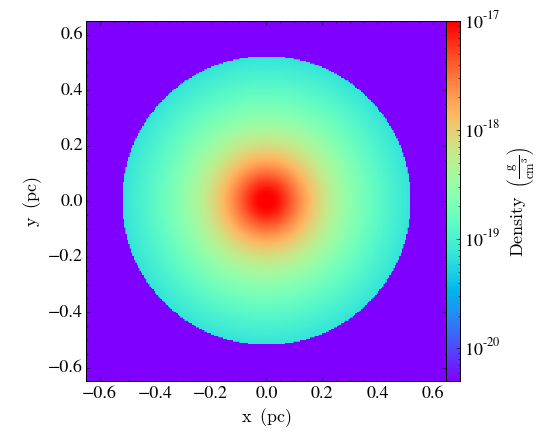


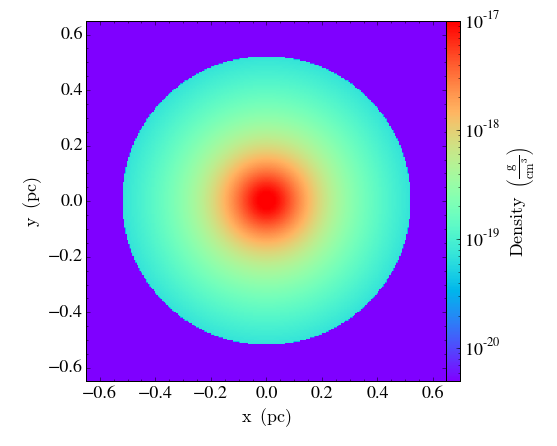


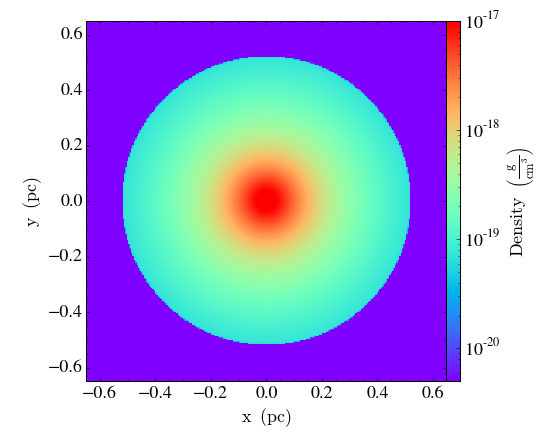


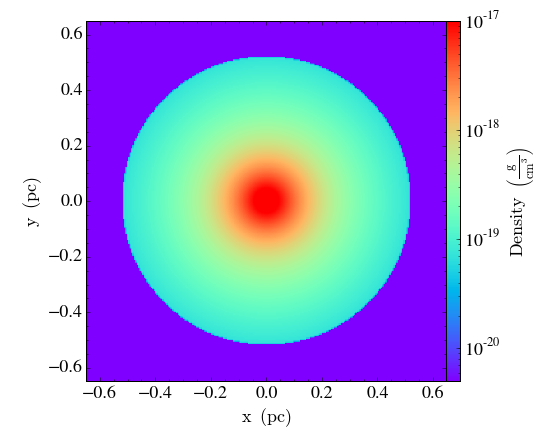


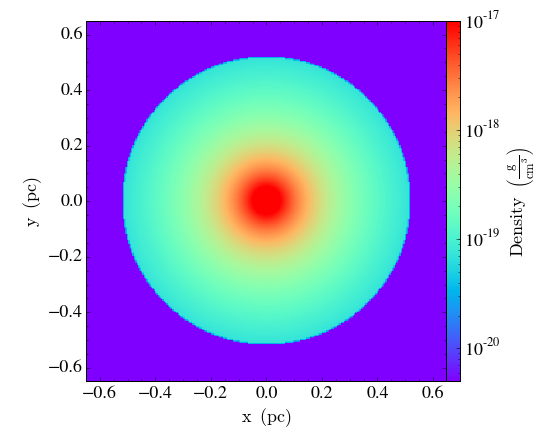


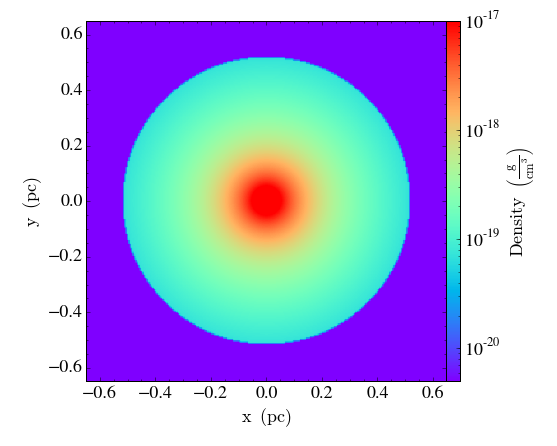


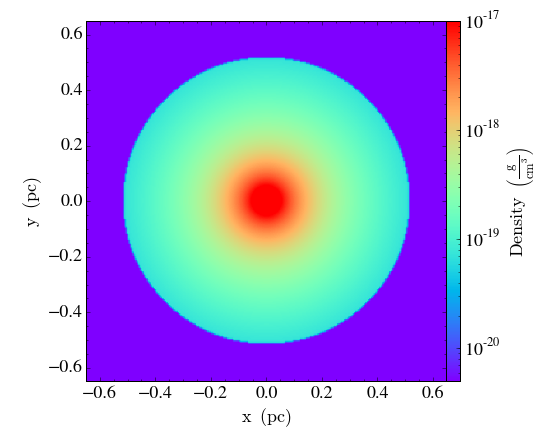


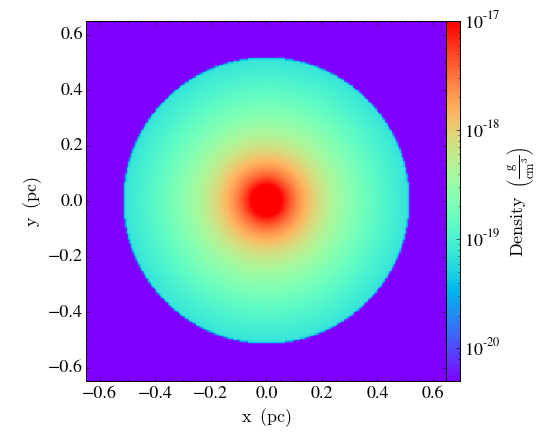


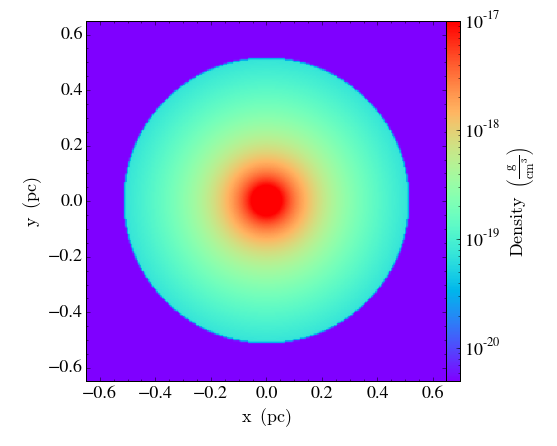


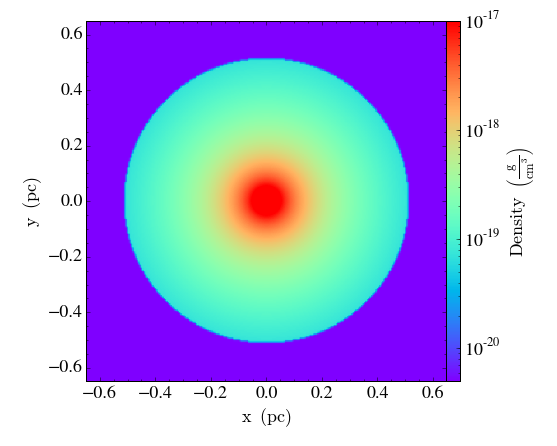


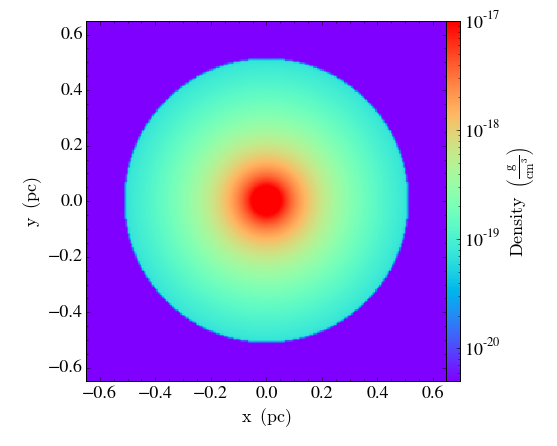

In [9]:
FINAL_STEP = 51
for i in np.arange(FINAL_STEP):
    if i%5==0:
        plot_dens(i,grid=False,zmin = 5e-21,zmax=1e-17)

Non-convergence riemann at t = 50 


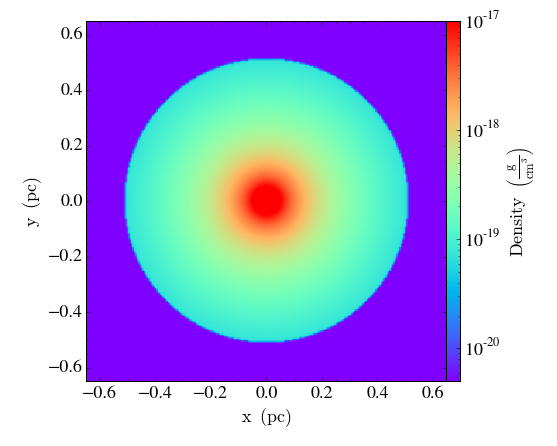

In [8]:
plot_dens(51,grid=False,zmin = 5e-21,zmax=1e-17)

- Looking inside ../FLASH4.3_2/object/fat100/ we see that the non-sink version only ran for 40 timesteps so this is good because the sink seems to have delayed the rieman non-convergence for na extra 10 timesteps till 50 

To DO: 

- Look into object/sinks_evol.dat
- Run MR plot on this 



In [30]:
cat sinks_evol.dat_cleaned

     [00]part_tag         [01]time         [02]posx         [03]posy         [04]posz         [05]velx         [06]vely         [07]velz       [08]accelx       [09]accely       [10]accelz        [11]anglx        [12]angly        [13]anglz         [14]mass         [15]mdot        [16]ptime
            65567  5.989750458E+11  1.996093750E+18  1.996093750E+18  1.996093750E+18  5.287251165E+04  5.285152704E+04  5.283048447E+04  0.000000000E+00  0.000000000E+00  0.000000000E+00  0.000000000E+00  0.000000000E+00  0.000000000E+00  1.081034229E+32  1.770398072E+22  5.989750458E+11
            65594  5.989750458E+11  2.003906250E+18  1.996093750E+18  1.996093750E+18 -5.287251165E+04  5.285152704E+04  5.283048447E+04  0.000000000E+00  0.000000000E+00  0.000000000E+00  0.000000000E+00  0.000000000E+00  0.000000000E+00  1.081034229E+32  1.770398072E+22  5.989750458E+11
            65622  5.989750458E+11  1.996093750E+18  2.003906250E+18  1.996093750E+18  5.287251165E+04 -5.285152704E+04  5.2830484

In [13]:
! sed -n '1{p;q}' sinks_evol.dat 

     [00]part_tag         [01]time         [02]posx         [03]posy         [04]posz         [05]velx         [06]vely         [07]velz       [08]accelx       [09]accely       [10]accelz        [11]anglx        [12]angly        [13]anglz         [14]mass         [15]mdot        [16]ptime


In [ ]:
cp ../source/Simulation/SimulationMain/unitTest/SinkMomTest/utils/clean_flashdat.py .
python clean_sinks_evol.py

In [23]:
data =np.loadtxt("sinks_evol.dat_cleaned",skiprows=1)

In [45]:
def compute_when_core_formation(FAT_FACTOR,CORE_FORMATION_IDX):
    ds = yt.load("../../FLASH4.3_2/object/fat{}/sod_hdf5_chk_0000".format(FAT_FACTOR))
    dim = 256
    all_data = ds.covering_grid(level=5, left_edge=[0,0.0,0.0],dims=[dim,dim,dim])
    rho  = np.max(np.array(all_data["density"]))
    print "central density is : ", rho
#     tff = sqrt(3*pi/(32*6.67e-8*rho))
#     print "tff: ",tff
    current_data = yt.load("../../FLASH4.3_2/object/fat{}/sod_hdf5_chk_{}".format(FAT_FACTOR,str(CORE_FORMATION_IDX).zfill(4)))
#     print "core formation at ",int(current_data.current_time)/tff, "tff"
    print "core formation at ",current_data.current_time
    return rho

In [46]:
rho_c = compute_when_core_formation(100,30)

central density is :  1.0145485398e-17
core formation at  9.5999310966e+11 code_time


 But t_core_formation is at 9.5999311e11  that's after the time as shown on the plot.

In [59]:
G = 6.67e-8
c_s  = 28730.5 #cm/s (based on T = 10K) 
print rho_c

1.0145485398e-17


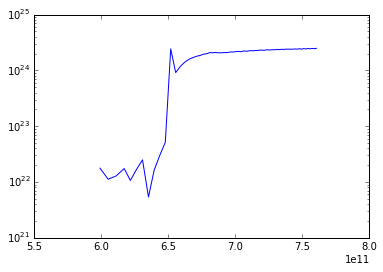

In [60]:
plt.semilogy(t,mdot)

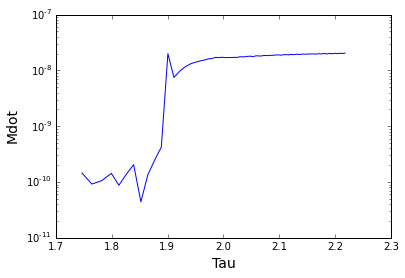

In [62]:
t = data[:,1]
tau = t*sqrt(4*pi*G*rho_c)
Mdot = data[:,15]
mdot = G*Mdot*sqrt(4*pi*G*rho_c)/(c_s**3)
plt.semilogy(tau,mdot)
plt.xlabel("Tau",fontsize=14)
plt.ylabel("Mdot",fontsize=14)
# plt.plot(t,mdot)

The scale on the y axis for M dot is also wrong even though the unit conversion was done

In [63]:
pwd

u'/global/project/projectdirs/astro250/doris/FLASH4.3_3/object'

(500000000.0, 8000000000.0)

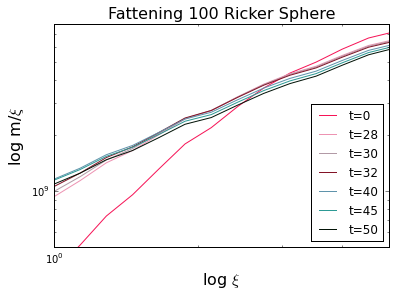

In [76]:
xi_range = np.logspace(0,1.04,num=20)
tlst = [0,28,30,32,40,45,50]
hsv = plt.get_cmap('Plasma_r')
colors = hsv(np.linspace(0, 1.0, len(tlst)))
for s , c in zip(tlst,colors):
    data = np.loadtxt("sum_args_list{}_3.txt".format(s))
    plt.loglog(xi_range,4*np.pi*G*data/c_s,label= "t={}".format(s), color=c)
plt.legend(loc ="lower right")
plt.xlabel(r"log $\xi$",fontsize=16)
plt.ylabel(r"log m/$\xi$",fontsize=16)
plt.title("Fattening 100 Ricker Sphere",fontsize=16)
plt.xlim(1,10)
plt.xlim(1,5)
plt.ylim(5e8,8e9)